In [215]:
#%matplotlib notebook

In [216]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [217]:
import warnings
warnings.filterwarnings('ignore')

In [218]:
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
mouse_drug_data_to_load = "data/mouse_drug_data.csv"

clinical_data = pd.read_csv(clinical_trial_data_to_load)
mouse_data = pd.read_csv(mouse_drug_data_to_load)



In [219]:
clinical_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [220]:
mouse_data

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [221]:
combined_clinical_mouse_data = pd.merge(clinical_data, mouse_data, how ="outer", on="Mouse ID")
combined_clinical_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


# 1. Tumor Response to Treatment

In [222]:
drug_time_group = combined_clinical_mouse_data.groupby(['Drug','Timepoint'])
drug_time_group

In [223]:
tumor_volume_mean = round(drug_time_group["Tumor Volume (mm3)"].mean(),3)
tumor_volume_mean

Drug       Timepoint
Capomulin  0            45.000
           5            44.266
           10           43.084
           15           42.064
           20           40.716
                         ...  
Zoniferol  25           55.433
           30           57.714
           35           60.089
           40           62.917
           45           65.961
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [224]:
tumor_response_1 = pd.DataFrame(tumor_volume_mean)
tumor_response_1 = tumor_response_1.reset_index()
tumor_response_1

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000
1,Capomulin,5,44.266
2,Capomulin,10,43.084
3,Capomulin,15,42.064
4,Capomulin,20,40.716
...,...,...,...
95,Zoniferol,25,55.433
96,Zoniferol,30,57.714
97,Zoniferol,35,60.089
98,Zoniferol,40,62.917


In [225]:
tumor_volume_sem = round(drug_time_group["Tumor Volume (mm3)"].sem(),3)
tumor_volume_sem

Drug       Timepoint
Capomulin  0            0.000
           5            0.449
           10           0.703
           15           0.839
           20           0.910
                        ...  
Zoniferol  25           0.603
           30           0.800
           35           0.881
           40           0.999
           45           1.004
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [226]:
tumor_response_2 = pd.DataFrame(tumor_volume_sem)
tumor_response_2 = tumor_response_2.reset_index()
tumor_response_2

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000
1,Capomulin,5,0.449
2,Capomulin,10,0.703
3,Capomulin,15,0.839
4,Capomulin,20,0.910
...,...,...,...
95,Zoniferol,25,0.603
96,Zoniferol,30,0.800
97,Zoniferol,35,0.881
98,Zoniferol,40,0.999


In [227]:
tumor_mean_pivot = tumor_response_1.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
tumor_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000,45.000,45.000,45.000,45.000,45.000,45.000,45.000,45.000,45.000
5,44.266,46.503,47.062,47.389,46.796,47.126,47.249,43.945,47.527,46.852
10,43.084,48.285,49.404,49.582,48.694,49.423,49.102,42.532,49.464,48.690
15,42.064,50.094,51.296,52.400,50.933,51.360,51.067,41.495,51.529,50.779
20,40.716,52.157,53.198,54.921,53.644,54.364,53.347,40.238,54.067,53.170
25,39.940,54.288,55.715,57.679,56.732,57.483,55.504,38.974,56.166,55.433
30,38.769,56.770,58.299,60.995,59.560,59.809,58.196,38.703,59.827,57.714
35,37.817,58.828,60.742,63.372,62.685,62.421,60.350,37.452,62.441,60.089
40,36.958,61.468,63.163,66.069,65.601,65.053,63.046,36.574,65.356,62.917


In [228]:
tumor_sem_pivot = tumor_response_2.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
tumor_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.449,0.165,0.235,0.265,0.202,0.218,0.232,0.483,0.240,0.189
10,0.703,0.236,0.282,0.357,0.319,0.402,0.376,0.720,0.434,0.264
15,0.839,0.332,0.358,0.580,0.444,0.614,0.466,0.770,0.493,0.371
20,0.910,0.359,0.476,0.726,0.595,0.840,0.555,0.786,0.622,0.533


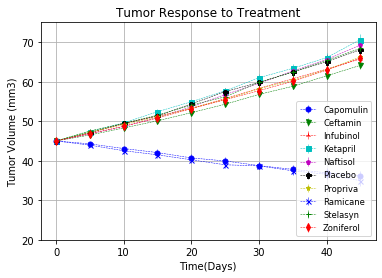

In [229]:
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Capomulin"], yerr=tumor_sem_pivot["Capomulin"],color='b',
             marker='o',markersize=5,linestyle="dashed",linewidth=0.50, label="Capomulin")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Ceftamin"], yerr=tumor_sem_pivot["Ceftamin"],color='g',
             marker='v',markersize=5,linestyle="dashed",linewidth=0.50, label="Ceftamin")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Infubinol"], yerr=tumor_sem_pivot["Infubinol"],color='r',
             marker='2',markersize=5,linestyle="dashed",linewidth=0.50, label="Infubinol")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Ketapril"], yerr=tumor_sem_pivot["Ketapril"],color='c',
             marker='s',markersize=5,linestyle="dashed",linewidth=0.50, label="Ketapril")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Naftisol"], yerr=tumor_sem_pivot["Naftisol"],color='m',
             marker='p',markersize=5,linestyle="dashed",linewidth=0.50, label="Naftisol")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Placebo"], yerr=tumor_sem_pivot["Placebo"],color='k',
             marker='P',markersize=5,linestyle="dashed",linewidth=0.50, label="Placebo")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Propriva"], yerr=tumor_sem_pivot["Propriva"],color='y',
             marker='*',markersize=5,linestyle="dashed",linewidth=0.50, label="Propriva")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Ramicane"], yerr=tumor_sem_pivot["Ramicane"],color='b',
             marker='x',markersize=5,linestyle="dashed",linewidth=0.50, label="Ramicane")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Stelasyn"], yerr=tumor_sem_pivot["Stelasyn"],color='g',
             marker='+',markersize=5,linestyle="dashed",linewidth=0.50, label="Stelasyn")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Zoniferol"], yerr=tumor_sem_pivot["Zoniferol"],color='r',
             marker='d',markersize=5,linestyle="dashed",linewidth=0.50, label="Zoniferol")
plt.title("Tumor Response to Treatment")
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(20,75)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.show()

# 2. Metastatic Response to Treatment

In [230]:
metastatic_mean = round(drug_time_group["Metastatic Sites"].mean(),3)
metastatic_mean

Drug       Timepoint
Capomulin  0            0.000
           5            0.160
           10           0.320
           15           0.375
           20           0.652
                        ...  
Zoniferol  25           1.688
           30           1.933
           35           2.286
           40           2.786
           45           3.071
Name: Metastatic Sites, Length: 100, dtype: float64

In [231]:
metastatic_response_1 = pd.DataFrame(metastatic_mean)
metastatic_response_1 = metastatic_response_1.reset_index()
metastatic_response_1

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000
1,Capomulin,5,0.160
2,Capomulin,10,0.320
3,Capomulin,15,0.375
4,Capomulin,20,0.652
...,...,...,...
95,Zoniferol,25,1.688
96,Zoniferol,30,1.933
97,Zoniferol,35,2.286
98,Zoniferol,40,2.786


In [232]:
metastatic_sem = round(drug_time_group["Metastatic Sites"].sem(),3)
metastatic_sem

Drug       Timepoint
Capomulin  0            0.000
           5            0.075
           10           0.125
           15           0.132
           20           0.162
                        ...  
Zoniferol  25           0.237
           30           0.248
           35           0.286
           40           0.300
           45           0.286
Name: Metastatic Sites, Length: 100, dtype: float64

In [233]:
metastatic_response_2 = pd.DataFrame(metastatic_sem)
metastatic_response_2 = metastatic_response_2.reset_index()
metastatic_response_2

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000
1,Capomulin,5,0.075
2,Capomulin,10,0.125
3,Capomulin,15,0.132
4,Capomulin,20,0.162
...,...,...,...
95,Zoniferol,25,0.237
96,Zoniferol,30,0.248
97,Zoniferol,35,0.286
98,Zoniferol,40,0.300


In [234]:
metastatic_mean_pivot = metastatic_response_1.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
metastatic_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.160,0.381,0.280,0.304,0.261,0.375,0.320,0.120,0.240,0.167
10,0.320,0.600,0.667,0.591,0.524,0.833,0.565,0.250,0.478,0.500
15,0.375,0.789,0.905,0.842,0.857,1.250,0.765,0.333,0.783,0.810
20,0.652,1.111,1.050,1.211,1.150,1.526,1.000,0.348,0.952,1.294


In [235]:
metastatic_sem_pivot = metastatic_response_2.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
metastatic_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.075,0.109,0.092,0.098,0.094,0.101,0.095,0.066,0.087,0.078
10,0.125,0.152,0.159,0.142,0.164,0.115,0.106,0.090,0.124,0.109
15,0.132,0.181,0.194,0.191,0.159,0.190,0.136,0.115,0.153,0.112
20,0.162,0.241,0.235,0.237,0.182,0.234,0.171,0.119,0.201,0.166


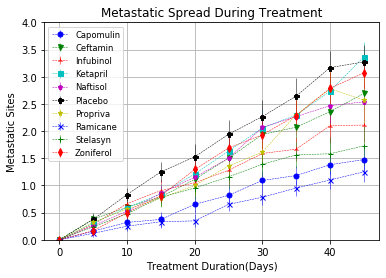

In [236]:
plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Capomulin"], yerr=metastatic_sem_pivot["Capomulin"],color='b',
             marker='o',markersize=5,linestyle="dashed",linewidth=0.50, label="Capomulin")

plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Ceftamin"], yerr=metastatic_sem_pivot["Ceftamin"],color='g',
             marker='v',markersize=5,linestyle="dashed",linewidth=0.50, label="Ceftamin")

plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Infubinol"], yerr=metastatic_sem_pivot["Infubinol"],color='r',
             marker='2',markersize=5,linestyle="dashed",linewidth=0.50, label="Infubinol")

plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Ketapril"], yerr=metastatic_sem_pivot["Ketapril"],color='c',
             marker='s',markersize=5,linestyle="dashed",linewidth=0.50, label="Ketapril")

plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Naftisol"], yerr=metastatic_sem_pivot["Naftisol"],color='m',
             marker='p',markersize=5,linestyle="dashed",linewidth=0.50, label="Naftisol")

plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Placebo"], yerr=metastatic_sem_pivot["Placebo"],color='k',
             marker='P',markersize=5,linestyle="dashed",linewidth=0.50, label="Placebo")

plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Propriva"], yerr=metastatic_sem_pivot["Propriva"],color='y',
             marker='*',markersize=5,linestyle="dashed",linewidth=0.50, label="Propriva")

plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Ramicane"], yerr=metastatic_sem_pivot["Ramicane"],color='b',
             marker='x',markersize=5,linestyle="dashed",linewidth=0.50, label="Ramicane")

plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Stelasyn"], yerr=metastatic_sem_pivot["Stelasyn"],color='g',
             marker='+',markersize=5,linestyle="dashed",linewidth=0.50, label="Stelasyn")

plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Zoniferol"], yerr=metastatic_sem_pivot["Zoniferol"],color='r',
             marker='d',markersize=5,linestyle="dashed",linewidth=0.50, label="Zoniferol")

plt.title("Metastatic Spread During Treatment")
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Metastatic Sites')
plt.ylim(0.0,4.0)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.show()

# 3. Survival Rates

In [237]:
mouse_count = round(drug_time_group["Mouse ID"].count(),3)
mouse_count

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
                        ..
Zoniferol  25           16
           30           15
           35           14
           40           14
           45           14
Name: Mouse ID, Length: 100, dtype: int64

In [238]:
mouse_response_1 = pd.DataFrame(mouse_count)
mouse_response_1 = mouse_response_1.reset_index()
mouse_response_1

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [239]:
metastatic_count_pivot = mouse_response_1.pivot(index="Timepoint",columns="Drug",values="Mouse ID")
metastatic_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


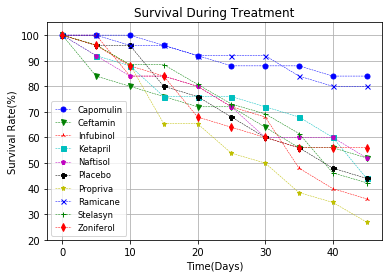

In [240]:
plt.plot(metastatic_count_pivot["Capomulin"]/25*100, color='b',
             marker='o',markersize=5,linestyle="dashed",linewidth=0.50, label="Capomulin")
plt.plot(metastatic_count_pivot["Ceftamin"]/25*100, color='g',
         marker='v',markersize=5,linestyle="dashed",linewidth=0.50, label="Ceftamin")
plt.plot(metastatic_count_pivot["Infubinol"]/25*100,color='r',
             marker='2',markersize=5,linestyle="dashed",linewidth=0.50, label="Infubinol")
plt.plot(metastatic_count_pivot["Ketapril"]/25*100,color='c',
             marker='s',markersize=5,linestyle="dashed",linewidth=0.50, label="Ketapril")
plt.plot(metastatic_count_pivot["Naftisol"]/25*100,color='m',
             marker='p',markersize=5,linestyle="dashed",linewidth=0.50, label="Naftisol")
plt.plot(metastatic_count_pivot["Placebo"]/25*100,color='k',
             marker='P',markersize=5,linestyle="dashed",linewidth=0.50, label="Placebo")
plt.plot(metastatic_count_pivot["Propriva"]/26*100,color='y',
             marker='*',markersize=5,linestyle="dashed",linewidth=0.50, label="Propriva")
plt.plot(metastatic_count_pivot["Ramicane"]/25*100,color='b',
             marker='x',markersize=5,linestyle="dashed",linewidth=0.50, label="Ramicane")
plt.plot(metastatic_count_pivot["Stelasyn"]/26*100,color='g',
             marker='+',markersize=5,linestyle="dashed",linewidth=0.50, label="Stelasyn")
plt.plot(metastatic_count_pivot["Zoniferol"]/25*100,color='r',
             marker='d',markersize=5,linestyle="dashed",linewidth=0.50, label="Zoniferol")
plt.title("Survival During Treatment")
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate(%)')
plt.ylim(20,105)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.show()

# 4. Summary Bar Graph

In [241]:
percent_change = (tumor_mean_pivot.iloc[-1]-tumor_mean_pivot.iloc[0])/tumor_mean_pivot.iloc[0]*100
percent_change

Drug
Capomulin   -19.475556
Ceftamin     42.515556
Infubinol    46.124444
Ketapril     57.028889
Naftisol     53.924444
Placebo      51.297778
Propriva     47.242222
Ramicane    -22.320000
Stelasyn     52.084444
Zoniferol    46.580000
dtype: float64

In [242]:
percent_ch = (percent_change["Capomulin"],percent_change["Ceftamin"], percent_change["Infubinol"], 
              percent_change["Ketapril"],percent_change["Naftisol"],percent_change["Placebo"],
             percent_change["Propriva"],percent_change["Ramicane"],percent_change["Stelasyn"],
             percent_change["Zoniferol"]) 
percent_ch

(-19.475555555555562,
 42.515555555555565,
 46.12444444444444,
 57.028888888888886,
 53.924444444444454,
 51.29777777777779,
 47.242222222222225,
 -22.319999999999993,
 52.08444444444444,
 46.58)

In [247]:
drug_name = ["Capomulin","Ceftamin","Infubinol", "Ketapril","Naftisol","Placebo",
             "Propriva","Ramicane","Stelasyn","Zoniferol"]

<Figure size 1440x1080 with 0 Axes>

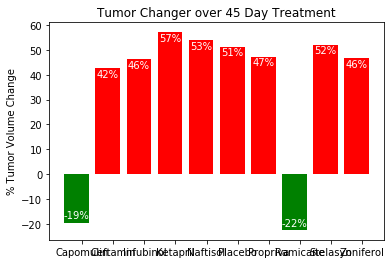

In [256]:
plt.figure(figsize=(20,15))
width = 0.35
x_axis = np.arange(len(percent_ch))

fig, ax = plt.subplots()

rects1 = ax.bar(drug_name[0],percent_ch[0],color="g")
rects2 = ax.bar(drug_name[1],percent_ch[1],color="r")
rects3 = ax.bar(drug_name[2],percent_ch[2],color="r")
rects4 = ax.bar(drug_name[3],percent_ch[3],color="r")
rects5 = ax.bar(drug_name[4],percent_ch[4],color="r")
rects6 = ax.bar(drug_name[5],percent_ch[5],color="r")
rects7 = ax.bar(drug_name[6],percent_ch[6],color="r")
rects8 = ax.bar(drug_name[7],percent_ch[7],color="g")
rects9 = ax.bar(drug_name[8],percent_ch[8],color="r")
rects10 = ax.bar(drug_name[9],percent_ch[9],color="r")

ax.set_title('Tumor Changer over 45 Day Treatment')
ax.set_ylabel('% Tumor Volume Change')
ax.set_xticks(x_axis + width / 2)
ax.set_xticklabels(('Capomulin','Ceftamin','Infubinol', 'Ketapril','Naftisol','Placebo',
             'Propriva','Ramicane','Stelasyn','Zoniferol'))


def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.20: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',
                ha='center', va='bottom', color='white')

autolabel(rects1, ax)
autolabel(rects2, ax)
autolabel(rects3, ax)
autolabel(rects4, ax)
autolabel(rects5, ax)
autolabel(rects6, ax)
autolabel(rects7, ax)
autolabel(rects8, ax)
autolabel(rects9, ax)
autolabel(rects10, ax)

plt.show()